### Part 4 - Dataset Utilities

In addition to the scientific computing features of Pytorch, it has utilities for common operations in Machine Learning such as dataset operations like sampling, shuffling, batching of data instances or loading of commonly used datasets. Some of these features are provided with `torchvision` library, which is a computer vision specialized library for Pytorch, which is also officially supported by Pytorch team, and commonly installed together with Pytorch.  For example, MNIST dataset is loaded using `torchvision.datasets`. 

In [1]:
import torch, torchvision
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Helper for visualization
def torch_imshow(img):
    img = img[0]
    plt.imshow(img.cpu().numpy())
    plt.show()

In [3]:
import torchvision.transforms as transforms

## this dataset is sampled as (PIL image, label) pairs by default
# .ToTensor() transform is used to convert to torch.Tensor before processing.
mnist = torchvision.datasets.MNIST('./', train=True, download=True, transform=transforms.ToTensor())

Pytorch datasets are Python objects that can be sampled by indexing or queried for its `__len__` field.

In [4]:
first_sample = mnist[0] #sampling by indexing

In [5]:
print(len(mnist)) #querying for __len__ field

60000


In [6]:
img, label = first_sample # 1 mnist sample is one image, label pair.

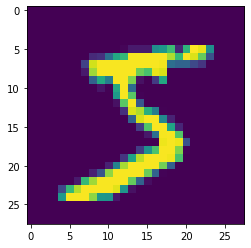

Class: 5


In [7]:
torch_imshow(img)
print(f'Class: {label}')

Pytorch DataLoader takes a dataset and creates an iterable while handles batching, shuffling and parallel loading of datasets.


Note that DataLoader has automatically created a a batch dimension.

In [8]:
loader = DataLoader(mnist, batch_size=16, shuffle=True, num_workers=1)

Dimensions of one batch: torch.Size([16, 1, 28, 28])


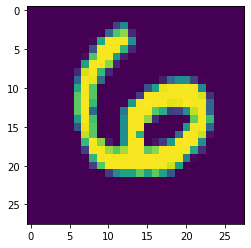

Label: 6


In [9]:
for imgs, labels in loader:
    print(f'Dimensions of one batch: {imgs.shape}')
    torch_imshow(imgs[0]) #Take the first image in the batch
    print(f'Label: {labels[0]}')
    
    break 
    #Dataloader normally iterates all over the dataset once,
    # so break statement should stay or you will print the first element
    # of every batch in the loader.
    
        